## Probability and Sampling Distributions


### Bayes' theorem applied
You have two coins in your hand. Out of the two coins, one is a real coin and the second one is a faulty one with tails on both sides.

You are blindfolded and forced to choose a random coin and then toss it in the air. The coin falls down with tails facing upwards. Our goal is to find the probability that this is the faulty coin.

In [1]:
# Print P(tails)
print(3/4)

# Print P(faulty)
print(1/2)

# Print P(tails | faulty)
print(1)

# Print P(faulty | tails)
print(2/3)

0.75
0.5
1
0.6666666666666666


### Samples from a rolled die

Generate a sample of 10 die rolls and assign it to our small variable.

Assign the mean of the sample to a variable named small_mean and print the results; notice how close it is to the true mean.

Similarly, create a larger sample of 1000 die rolls and assign the list to a variable named large.

Assign the mean of the larger sample to a variable named large_mean and print the mean; which theorem is at work here?

In [2]:
from numpy.random import randint

# Create a sample of 10 die rolls
small = randint(1, 7, size = 10)

# Calculate and print the mean of the sample
print(small.mean())


# Create a sample of 1000 die rolls
large = randint(1, 7, size = 1000)

# Calculate and print the mean of the large sample
print(large.mean())


3.3
3.5


### Simulating central limit theorem

Create a list named means with 1000 sample means from samples of size 30 by using list comprehension.

In [3]:
from numpy.random import randint

# Create a list of 1000 sample means of size 30
means = [randint(1, 7, 30).mean() for i in range(1000)]

Create and show a matplotlib histogram of the means; examine the shape of the distribution.

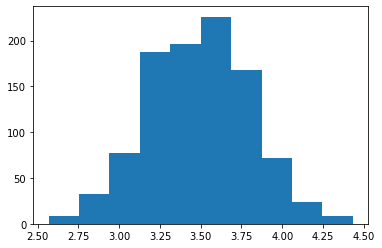

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(means)
plt.show()

Adapt your code to visualize only 100 samples; did the distribution change at all?

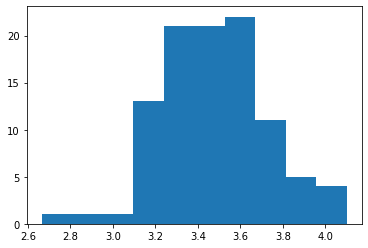

In [5]:
from numpy.random import randint

# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(100)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

### Bernoulli distribution
Generate a sample using the rvs() function with size set to 100; assign it to the data variable.

In [6]:
# Generate bernoulli data
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=100)

Create and display a matplotlib histogram; examine the shape of the distribution.

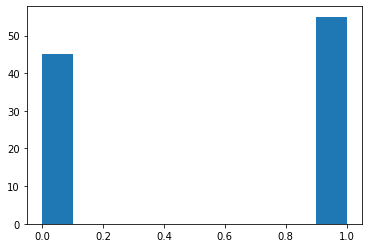

In [7]:
# Plot distribution
plt.hist(data)
plt.show()

Adapt the code to take a sample of 1000 observations this time.

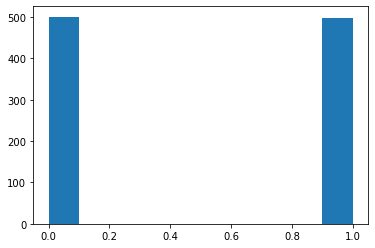

In [8]:
# Generate bernoulli data
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=1000)

# Plot distribution
plt.hist(data)
plt.show()

### Binomial distribution

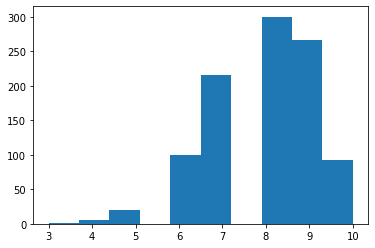

0.6241903616
0.10737418240000005


In [9]:
# Generate binomial data
from scipy.stats import binom
data = binom.rvs(n=10, p=0.8, size=1000)

# Plot the distribution
plt.hist(data)
plt.show()

# Assign and print probability of 8 or less successes
prob1 = binom.cdf(k=8, n=10, p=0.8)
print(prob1)

# Assign and print probability of all 10 successes
prob2 = binom.pmf(k=10, n=10, p=0.8)
print(prob2)

### Normal distribution

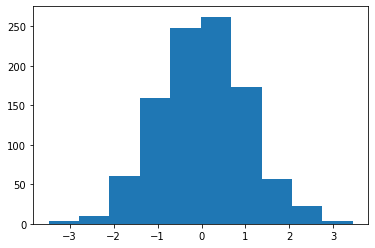

0.02275013194817921
0.03


In [10]:
# Generate normal data
from scipy.stats import norm
data = norm.rvs(size=1000)

# Plot distribution
plt.hist(data)
plt.show()

# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print(true_prob)

# Compute and sample probability for greater than 2
sample_prob = sum(obs > 2 for obs in data) / len(data)
print(sample_prob)

## Exploratory Data Analysis

### Mean or median

In [11]:
import pandas as pd
weather = pd.read_csv('weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


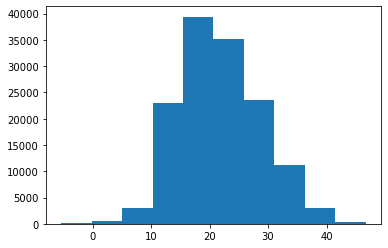

21.687234973147767
21.1


In [12]:
# Visualize the distribution 
plt.hist(weather['Temp3pm'])
plt.show()

# Assign the mean to the variable and print the result
print(weather['Temp3pm'].mean())


# Assign the median to the variable and print the result
print(weather['Temp3pm'].median())


### Standard deviation by hand

In [13]:
# Create a sample list
import math
import numpy as np
nums = [1, 2, 3, 4, 5]

# Compute the mean of the list
mean = sum(nums) / len(nums)

# Compute the variance and print the std of the list
variance = sum(pow(x - mean, 2) for x in nums) / len(nums)
std = math.sqrt(variance)
print(std)

# Compute and print the actual result from numpy
real_std = np.array(nums).std()
print(real_std)

1.4142135623730951
1.4142135623730951


### Encoding techniques

In [14]:
import pandas as pd
laptops = pd.read_csv('laptops.csv', encoding = "ISO-8859-1", index_col = 0) #[['Company', 'Product', 'Price']]
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [15]:
from sklearn import preprocessing

# Create the encoder and print our encoded new_vals
encoder = preprocessing.LabelEncoder()
new_vals = encoder.fit_transform(laptops['Company'])
print(new_vals)

[ 1  1  7 ... 10  7  2]


In [16]:
# One-hot encode Company for laptops2
laptops2 = pd.get_dummies(data=laptops, columns=['Company'])
laptops2.head()

,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
2,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
3,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
4,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
5,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0


### Exploring laptop prices

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


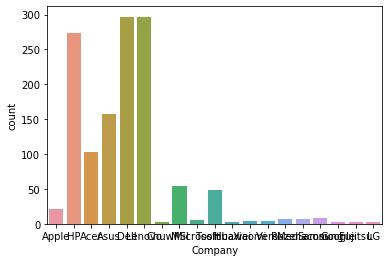

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Get some initial info about the data
laptops.info()

# Produce a countplot of companies
sns.countplot(laptops['Company'])
plt.show()

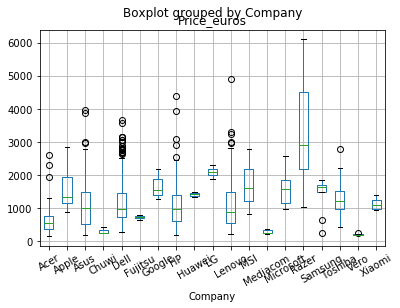

In [18]:
# Visualize the relationship with price
laptops.boxplot('Price_euros', 'Company', rot=30)
plt.show()

### Types of relationships

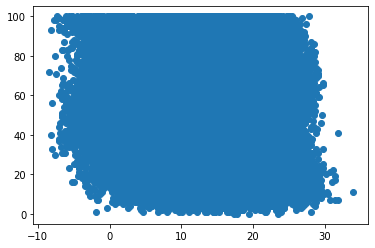

In [19]:
# Display a scatter plot and examine the relationship
plt.scatter(weather['MinTemp'], weather['Humidity3pm'])
plt.show()

### Pearson correlation

In [20]:
# Generate the pair plot for the weather dataset
# sns.pairplot(weather)
# plt.show()

In [21]:
# Compute and print the Pearson correlation
r = weather['Humidity9am'].corr(weather['Humidity3pm'])

# Calculate the r-squared value and print the result
r2 = r ** 2
print(r2)

0.4454065284952251


### Sensitivity to outliers

In [ ]:
# Drop the outlier from the dataset
df = df.drop(2)

# Compute and print the correlation once more
new_corr  = df['X'].corr(df['Y'])
print(new_corr)

## Statistical Experiments and Significance Testing

### Confidence interval by hand

In [23]:
from scipy.stats import sem, t
data = [1, 2, 3, 4, 5]
confidence = 0.95

z_score = 2.7764451051977987
sample_mean = np.mean(data)

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * z_score

# Compute and print the lower threshold
lower = sample_mean - margin_error
print(lower)

# Compute and print the upper threshold
upper = sample_mean + margin_error
print(upper)

1.036756838522439
4.9632431614775605


### Applying confidence intervals

In [24]:
def proportion_confint(count, nobs, alpha=0.05, method='normal'):
    '''confidence interval for a binomial proportion

    Parameters
    ----------
    count : int or array_array_like
        number of successes, can be pandas Series or DataFrame
    nobs : int
        total number of trials
    alpha : float in (0, 1)
        significance level, default 0.05
    method : string in ['normal']
        method to use for confidence interval,
        currently available methods :

         - `normal` : asymptotic normal approximation
         - `agresti_coull` : Agresti-Coull interval
         - `beta` : Clopper-Pearson interval based on Beta distribution
         - `wilson` : Wilson Score interval
         - `jeffreys` : Jeffreys Bayesian Interval
         - `binom_test` : experimental, inversion of binom_test

    Returns
    -------
    ci_low, ci_upp : float, ndarray, or pandas Series or DataFrame
        lower and upper confidence level with coverage (approximately) 1-alpha.
        When a pandas object is returned, then the index is taken from the
        `count`.

    Notes
    -----
    Beta, the Clopper-Pearson exact interval has coverage at least 1-alpha,
    but is in general conservative. Most of the other methods have average
    coverage equal to 1-alpha, but will have smaller coverage in some cases.

    The 'beta' and 'jeffreys' interval are central, they use alpha/2 in each
    tail, and alpha is not adjusted at the boundaries. In the extreme case
    when `count` is zero or equal to `nobs`, then the coverage will be only
    1 - alpha/2 in the case of 'beta'.

    The confidence intervals are clipped to be in the [0, 1] interval in the
    case of 'normal' and 'agresti_coull'.

    Method "binom_test" directly inverts the binomial test in scipy.stats.
    which has discrete steps.

    TODO: binom_test intervals raise an exception in small samples if one
       interval bound is close to zero or one.

    References
    ----------
    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval

    Brown, Lawrence D.; Cai, T. Tony; DasGupta, Anirban (2001). "Interval
        Estimation for a Binomial Proportion",
        Statistical Science 16 (2): 101–133. doi:10.1214/ss/1009213286.
        TODO: Is this the correct one ?

    '''

    pd_index = getattr(count, 'index', None)
    if pd_index is not None and hasattr(pd_index, '__call__'):
        # this rules out lists, lists have an index method
        pd_index = None
    count = np.asarray(count)
    nobs = np.asarray(nobs)

    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha

    if method == 'normal':
        std_ = np.sqrt(q_ * (1 - q_) / nobs)
        dist = stats.norm.isf(alpha / 2.) * std_
        ci_low = q_ - dist
        ci_upp = q_ + dist

    elif method == 'binom_test':
        # inverting the binomial test
        def func(qi):
            return stats.binom_test(q_ * nobs, nobs, p=qi) - alpha
        if count == 0:
            ci_low = 0
        else:
            ci_low = optimize.brentq(func, float_info.min, q_)
        if count == nobs:
            ci_upp = 1
        else:
            ci_upp = optimize.brentq(func, q_, 1. - float_info.epsilon)

    elif method == 'beta':
        ci_low = stats.beta.ppf(alpha_2, count, nobs - count + 1)
        ci_upp = stats.beta.isf(alpha_2, count + 1, nobs - count)

        if np.ndim(ci_low) > 0:
            ci_low[q_ == 0] = 0
            ci_upp[q_ == 1] = 1
        else:
            ci_low = ci_low if (q_ != 0) else 0
            ci_upp = ci_upp if (q_ != 1) else 1

    elif method == 'agresti_coull':
        crit = stats.norm.isf(alpha / 2.)
        nobs_c = nobs + crit**2
        q_c = (count + crit**2 / 2.) / nobs_c
        std_c = np.sqrt(q_c * (1. - q_c) / nobs_c)
        dist = crit * std_c
        ci_low = q_c - dist
        ci_upp = q_c + dist

    elif method == 'wilson':
        crit = stats.norm.isf(alpha / 2.)
        crit2 = crit**2
        denom = 1 + crit2 / nobs
        center = (q_ + crit2 / (2 * nobs)) / denom
        dist = crit * np.sqrt(q_ * (1. - q_) / nobs + crit2 / (4. * nobs**2))
        dist /= denom
        ci_low = center - dist
        ci_upp = center + dist

    # method adjusted to be more forgiving of misspellings or incorrect option name
    elif method[:4] == 'jeff':
        ci_low, ci_upp = stats.beta.interval(1 - alpha, count + 0.5,
                                             nobs - count + 0.5)

    else:
        raise NotImplementedError('method "%s" is not available' % method)

    if method in ['normal', 'agresti_coull']:
        ci_low = np.clip(ci_low, 0, 1)
        ci_upp = np.clip(ci_upp, 0, 1)
    if pd_index is not None and np.ndim(ci_low) > 0:
        import pandas as pd
        if np.ndim(ci_low) == 1:
            ci_low = pd.Series(ci_low, index=pd_index)
            ci_upp = pd.Series(ci_upp, index=pd_index)
        if np.ndim(ci_low) == 2:
            ci_low = pd.DataFrame(ci_low, index=pd_index)
            ci_upp = pd.DataFrame(ci_upp, index=pd_index)

    return ci_low, ci_upp

In [25]:
from scipy.stats import binom
import numpy as np
from scipy import stats
# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .10)
    print(confidence_interval)

(0.507090652487504, 0.732909347512496)
(0.3440640699353905, 0.5759359300646095)
(0.2860411978842442, 0.5139588021157558)
(0.4037843688532205, 0.6362156311467796)
(0.3440640699353905, 0.5759359300646095)
(0.3245317440082245, 0.5554682559917755)
(0.3836912846323326, 0.6163087153676674)
(0.4037843688532205, 0.6362156311467796)
(0.36378436885322046, 0.5962156311467796)
(0.3440640699353905, 0.5759359300646095)


### One tailed z-test

In [26]:
import pandas as pd
results = pd.read_csv('ab_data.csv')[['group', 'converted']]
results.columns = ['Group', 'Converted']

In [27]:
# Assign and print the conversion rate for each group
conv_rates = results.groupby('Group').Converted.mean()

In [28]:
# Assign the number of conversions and total trials
num_control = results[results['Group'] == 'control']['Converted'].sum()
total_control = len(results[results['Group'] == 'control'])

# Assign the number of conversions and total trials
num_treat = results[results['Group'] == 'treatment']['Converted'].sum()
total_treat = len(results[results['Group'] == 'treatment'])

from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.216


### Two tailed t-test

In [29]:
# Display the mean price for each group
prices = laptops.groupby('Company').Price_euros.mean()
print(prices)

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


### Two tailed t-test

In [30]:
# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price_euros']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price_euros']

# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('{0:0.3f}'.format(pval))

0.133


### Calculating sample size

In [31]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)

# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=.95)
print(sample_size)

1807.7621477153323


In [32]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)

# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=0.8)
print(sample_size)

1091.8961587171991


### Visualizing the relationship

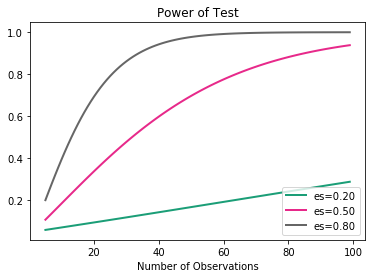

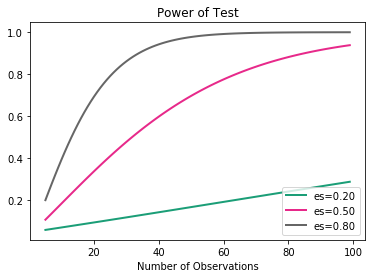

In [33]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower(nobs = sample_sizes, effect_size = effect_sizes)

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)

### Calculating error rates

Compute and print the probability of your colleague getting a Type I error.

In [34]:
# Print error rate for 60 tests with 5% significance
error_rate = 1 - (.95**(60))
print(error_rate)

0.953930201013048


### Bonferroni correction

In [35]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]


## Regression and Classification


### Linear regression

In [41]:
from sklearn.linear_model import LinearRegression 
X_train = np.array(weather['Humidity9am'].dropna()[:1000]).reshape(-1,1)
y_train = weather['Humidity3pm'].dropna()[:1000]

# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assign and print predictions
preds = lm.predict(X_train)

# Assign and print coefficient 
coef = lm.coef_
print(coef)

[0.84985779]


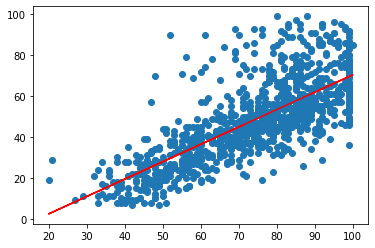

In [42]:
# Plot your fit to visualize your model
plt.scatter(X_train, y_train)
plt.plot(X_train, preds, color='red')
plt.show()

### Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

# Create and fit your model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train.values.ravel())

coefs = clf.coef_

# Compute and print the accuracy
# acc = clf.score(X_test, y_test)
# print(acc)

/Users/huiren/anaconda3/envs/2019/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Regression evaluation

In [47]:
# R-squared score
r2 = lm.score(X_train, y_train)
print(r2)

0.5510123543675691


In [48]:
# Mean squared error
from sklearn.metrics import mean_squared_error
preds = lm.predict(X_train)
mse = mean_squared_error(y_train, preds)
print(mse)

179.35337673409364


In [49]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
preds = lm.predict(X_train)
mae = mean_absolute_error(y_train, preds)
print(mae)

10.042254563194023


### Classification evaluation

In [ ]:
# Generate and output the confusion matrix
from sklearn.metrics import confusion_matrix
preds = clf.predict(X_test)
matrix = confusion_matrix(y_test, preds)
print(matrix)


In [ ]:
# Compute and print the precision
from sklearn.metrics import precision_score
preds = clf.predict(X_test)
precision = precision_score(y_test, preds)
print(precision)

In [ ]:
# Compute and print the recall
from sklearn.metrics import recall_score
preds = clf.predict(X_test)
recall = recall_score(y_test, preds)
print(recall)

### Handling null values

In [50]:
# Identify and print the the rows with null values
nulls = laptops[laptops.isnull().any(axis=1)]
print(nulls)

Empty DataFrame
Columns: [Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros]
Index: []


In [ ]:
# Impute constant value 0
laptops.fillna(0, inplace=True)

In [ ]:
# Impute median price
laptops.fillna(laptops.median(), inplace=True)

In [ ]:
# Drop each row with a null value
laptops.dropna(inplace=True)

### Identifying outliers

In [54]:
laptops = laptops.rename(columns = {'Price_euros': 'Price'})
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [55]:
laptops.rename({'Price_euros': 'Price'}, inplace = True)
# Calculate the mean and std
mean, std = laptops['Price'].mean(), laptops['Price'].std()

# Compute and print the upper and lower threshold
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
print(lower, 'to', upper)

# Identify and print rows with outliers
outliers = laptops[(laptops['Price'] > upper) | 
                   (laptops['Price'] < lower)]
print(outliers)

# Drop the rows from the dataset
laptops = laptops[(laptops['Price'] <= upper) | 
                  (laptops['Price'] >= lower)]

-973.3401360432808 to 3220.7141191591672
     Company             Product     TypeName  Inches  \
200    Razer           Blade Pro       Gaming    17.3   
243     Asus   ROG G703VI-E5062T       Gaming    17.3   
617   Lenovo        Thinkpad P51     Notebook    15.6   
731     Dell        Alienware 17       Gaming    17.3   
752   Lenovo       Thinkpad P51s  Workstation    15.6   
758       HP            Zbook 17  Workstation    17.3   
789     Dell        Alienware 17       Gaming    17.3   
839    Razer           Blade Pro       Gaming    17.3   
1081    Asus          ROG G701VO       Gaming    17.3   
1096  Lenovo  IdeaPad Y900-17ISK       Gaming    17.3   
1151      HP            ZBook 17  Workstation    17.3   
1249   Razer           Blade Pro       Gaming    14.0   

                         ScreenResolution                            Cpu  \
200   4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz   
243                     Full HD 1920x1080    Intel Core i7 7820HK

### Visualizing the tradeoff

In [ ]:
# Use X and y to create a scatterplot
plt.scatter(X, y)

# Add your model predictions to the scatter plot 
plt.plot(np.sort(X), preds)

# Add the higher-complexity model predictions as well
plt.plot(np.sort(X), preds2)
plt.show()